# Example - Labeling Zalando pics

### Introduction

This example shows how to develop a **neural network classifier**. It uses data from the file `zalando.csv`, which contains data of 70,000 labeled 28x28 grayscale images of Zalando's articles. The labels are associated to the following articles: T-shirt/top (0), trousers (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8) and ankle boot (9).

These data were intended to serve as a direct drop-in replacement for the MNIST data, for benchmarking machine learning algorithms. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. Each pixel has a single pixel-value associated with it, indicating lightness or darkness. This pixel-value is an integer between 0 and 255 (0 = Black, 255 = White). In the data set, every row stands for an image. The label is in the first column, and the rest of the columns contain the pixel-values of the image.

### The data set

The data from the 70,000 images come in seven CSV files (`zalando1.csv`, `zalando2.csv`, etc), to fit the size constraints of GitHub. Every row stands for an image. The first column is a label identifying the digit (0-9), and the other 784 columns correspond to the image pixels (28 x 28 = 784). The column name `pixelnum` must be read as the gray intensity of the pixel `n`, counting pixels by row, from top-left to bottom-right. The intensities are integers from 0 = Black to 255 = White (8-bit grayscale).

### Importing the data

I import the data, from each of these remote files to a **structured NumPy array**, getting seven arrays with 10,000 rows each. This may take a while, depending on your connection.

In [1]:
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/cinnData/MLearning/main/11.%20Neural%20networks/'
d1 = np.genfromtxt(path + 'zalando1.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d2 = np.genfromtxt(path + 'zalando2.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d3 = np.genfromtxt(path + 'zalando3.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d4 = np.genfromtxt(path + 'zalando4.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d5 = np.genfromtxt(path + 'zalando5.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d6 = np.genfromtxt(path + 'zalando6.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
d7 = np.genfromtxt(path + 'zalando7.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

Then, we paste the seven pieces with the NumPy's `concatenate`:

In [3]:
data = np.concatenate([d1, d2, d3, d4, d5, d6, d7])

The data set is a perfectly unbalanced: 7,000 images of each type.

In [4]:
np.unique(data['label'], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000]))

### Target vector and feature matrix

I set the first column as the **target vector**:

In [5]:
y = data['label']

The 784 columns containing the pixel intensities will form the **feature matrix**:

In [6]:
from numpy.lib.recfunctions import structured_to_unstructured
X = structured_to_unstructured(data)[:, 1:]

The shape is as expected:

In [7]:
X.shape

(70000, 784)

The pixel values are also as expected:

In [8]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Plotting the images

To guess how difficult the classification could be, I plot an image of every type. I start by  an image of a T-shirt/top:

In [9]:
from matplotlib import pyplot as plt

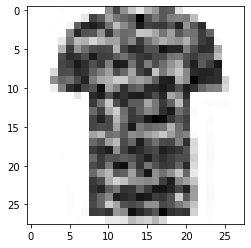

In [10]:
plt.gray()
X0 = X[y == 0, :]
plt.imshow(255 - X0[0, :].reshape(28,28));

An image of trousers:

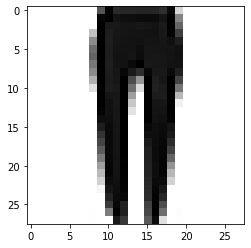

In [11]:
X1 = X[y == 1, :]
plt.imshow(255 - X1[0, :].reshape(28,28));

A pullover:

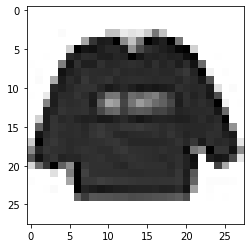

In [12]:
X2 = X[y == 2, :]
plt.imshow(255 - X2[0, :].reshape(28,28));

A dress:

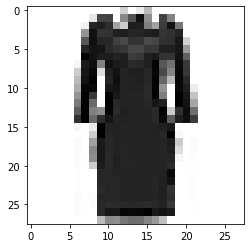

In [13]:
X3 = X[y == 3, :]
plt.imshow(255 - X3[0, :].reshape(28,28));

A coat:

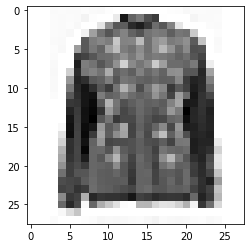

In [14]:
X4 = X[y == 4, :]
plt.imshow(255 - X4[0, :].reshape(28,28));

A sandal:

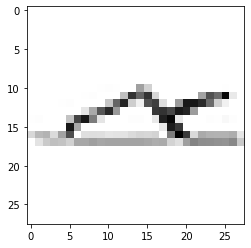

In [15]:
X5 = X[y == 5, :]
plt.imshow(255 - X5[0, :].reshape(28,28));

A shirt:

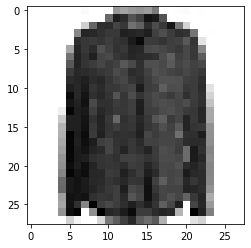

In [16]:
X6 = X[y == 6, :]
plt.imshow(255 - X6[0, :].reshape(28,28));

A sneaker:

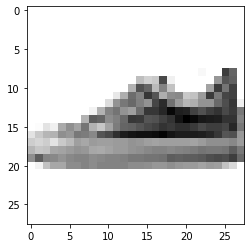

In [17]:
X7 = X[y == 7, :]
plt.imshow(255 - X7[0, :].reshape(28,28));

A bag:

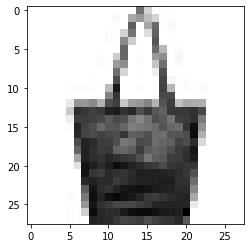

In [18]:
X8 = X[y == 8, :]
plt.imshow(255 - X8[0, :].reshape(28,28));

Finally, an ankle boot:

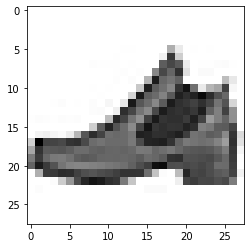

In [19]:
X9 = X[y == 9, :]
plt.imshow(255 - X9[0, :].reshape(28,28));

### Train-test split

I split the data set to validate the classification models that I am going to obtain. I keep 10,000 pictures for testing, to follow the tradition. I set `random_state=0` everywhere in this example, for repeatability.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

### Random forest classifier

I start with a **random forest classifier**, to get a benchmark for the neural network models. From our experience with the MNIST data set, the arguments `max_leaf_nodes=256`, and `n_estimators=100` look like reasonable choices.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_leaf_nodes=256, n_estimators=100, random_state=0)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.871, 0.855)

The **accuracy** is lower than for the MNIST data, as could be expected from our exploration of the images. 

### Multilayer perceptron classifier

I will try first a **MLP classifier** based on a network with **one hidden layer of 32 nodes** (powers of 2 are popular among practitioners). 

In [22]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(hidden_layer_sizes=(32), random_state=0)
mlpclf.fit(X_train, y_train)
round(mlpclf.score(X_train, y_train), 3), round(mlpclf.score(X_test, y_test), 3)

(0.864, 0.837)

The accuracy is a bit lower, and overfitting a bit more clear.

### Normalization

With the MNIST data, I normalized the data, to get feature values within the interval [0, 1]. As shown below, this has no effect on a tree-based algorithm like a random forest classifier. Indeed, a decision tree does not change if we apply a linear transformation to any feature, the cutoffs used in the splits are just adjusted. 

In [23]:
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

In [24]:
rfclf = RandomForestClassifier(max_leaf_nodes=256, n_estimators=100, random_state=0)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.871, 0.855)

But something unexpected happens here:

In [25]:
mlpclf = MLPClassifier(hidden_layer_sizes=(32), random_state=0)
mlpclf.fit(X_train, y_train)
round(mlpclf.score(X_train, y_train), 3), round(mlpclf.score(X_test, y_test), 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.947, 0.875)

Let me explain this a bit. The search for the optimal weights of a neural network model starts with a random choice. With all the features varying within the interval [0, 1], the training is more efficient, which, sometimes, leads to a model with more accuracy. But, at the same time, it may accentuate the overfitting.

What is the warning telling us? That there is still room for improvement on the training data, since the weights are not optimal. But we are not probably interested on that, since, by improving the model on the training data, we may be just overfitting, and potentially spoiling the model. So, I reduce the number of iterations, instead of raising it:

In [26]:
mlpclf = MLPClassifier(hidden_layer_sizes=(32), max_iter=100, random_state=0)
mlpclf.fit(X_train, y_train)
round(mlpclf.score(X_train, y_train), 3), round(mlpclf.score(X_test, y_test), 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.938, 0.884)

So, it seems that, beyond a certain number of iterations, the model improves on the training data but gets worse on the test data. With 50 iterations:

In [27]:
mlpclf = MLPClassifier(hidden_layer_sizes=(32), max_iter=50, random_state=0)
mlpclf.fit(X_train, y_train)
round(mlpclf.score(X_train, y_train), 3), round(mlpclf.score(X_test, y_test), 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.921, 0.889)

With 25 iterations:

In [28]:
mlpclf = MLPClassifier(hidden_layer_sizes=(32), max_iter=25, random_state=0)
mlpclf.fit(X_train, y_train)
round(mlpclf.score(X_train, y_train), 3), round(mlpclf.score(X_test, y_test), 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.898, 0.882)

The conclusion is that we can get better results with the neural network classifier than with the random forest classifier. But we have to take extra care with normalization and the number of iterations.

### Homework

1. Repeat the analysis using `random_state=1`, comparing the results to those obtained above.

2. Would a network with two hidden layers of 16 nodes each get better results?

3. What about a network with a hidden layer of 64 nodes?

4. Can we get better results with a **gradient boosting classifier**?